In [1]:
from natasha import NamesExtractor
	

text = '''
Простите, еще несколько цитат из приговора. «…Отрицал существование
Иисуса и пророка Мухаммеда», «наделял Иисуса Христа качествами
ожившего мертвеца — зомби» [и] «качествами покемонов —
представителей бестиария японской мифологии, тем самым совершил
преступление, предусмотренное статьей 148 УК РФ
'''
extractor = NamesExtractor()
matches = extractor(text)
for match in matches:
    print(match.span, match.fact)



[69, 75) Name(first='иисус', middle=None, last=None, nick=None)
[86, 95) Name(first='мухаммед', middle=None, last=None, nick=None)
[107, 120) Name(first='иисус', middle=None, last='христос', nick=None)


Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_tokenizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_lemmatizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_parser.pt', 'pretrain_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru'

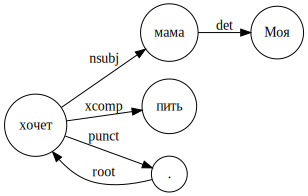

In [2]:
from sagas.nlu.corenlp_helper import CoreNlp, CoreNlpViz, langs
nlp=langs['ru']()
CoreNlpViz().analyse('Моя мама хочет пить.', nlp)

text: Я 	lemma: я	upos: PRON	xpos: _
text: ем 	lemma: есть	upos: VERB	xpos: _
text: вилкой 	lemma: вилка	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Я', '2', 'nsubj')
('ем', '0', 'root')
('вилкой', '2', 'obl')
('.', '2', 'punct')


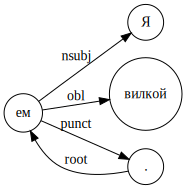

In [3]:
CoreNlpViz().analyse('Я ем вилкой.', nlp)

text: Иван 	lemma: иван	upos: PROPN	xpos: _
text: лучший 	lemma: лучший	upos: ADJ	xpos: _
text: танцор 	lemma: танцор	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Иван', '3', 'nsubj')
('лучший', '3', 'amod')
('танцор', '0', 'root')
('.', '3', 'punct')


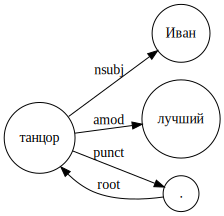

In [4]:
# Иван лучший танцор
CoreNlpViz().analyse('Иван лучший танцор.', nlp)

In [2]:
from natasha import (
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
)
extractor = NamesExtractor()
text = '''
Простите, еще несколько цитат из приговора. «…Отрицал существование
Иисуса и пророка Мухаммеда», «наделял Иисуса Христа качествами
ожившего мертвеца — зомби» [и] «качествами покемонов —
представителей бестиария японской мифологии, тем самым совершил
преступление, предусмотренное статьей 148 УК РФ
'''
matches = extractor(text)
matches

Matches('\nПростите, еще несколько цитат из приговора. «…Отрицал существование\nИисуса и пророка Мухаммеда», «наделял Иисуса Христа качествами\nожившего мертвеца - зомби» [и] «качествами покемонов -\nпредставителей бестиария японской мифологии, тем самым совершил\nпреступление, предусмотренное статьей 148 УК РФ\n',
        [Match([MorphTagToken('Иисуса',
                              [69, 75),
                              'RU',
                              'I',
                              [Form('иисус',
                                    Grams(NOUN,Name,anim,gent,masc,sing)),
                               Form('иисус',
                                    Grams(NOUN,Name,accs,anim,masc,sing))])],
               [69, 75)),
         Match([MorphTagToken('Мухаммеда',
                              [86, 95),
                              'RU',
                              'I',
                              [Form('мухаммед',
                                    Grams(NOUN,Name,anim,gent,masc,sing)),
                               Form('мухаммед',
                                    Grams(NOUN,Name,accs,anim,masc,sing))])],
               [86, 95)),
         Match([MorphTagToken('Иисуса',
                              [107, 113),
                              'RU',
                              'I',
                              [Form('иисус',
                                    Grams(NOUN,Name,anim,gent,masc,sing)),
                               Form('иисус',
                                    Grams(NOUN,Name,accs,anim,masc,sing))]),
                MorphTagToken('Христа',
                              [114, 120),
                              'RU',
                              'I',
                              [Form('христос',
                                    Grams(NOUN,Sgtm,anim,gent,masc,sing)),
                               Form('христос',
                                    Grams(NOUN,Sgtm,accs,anim,masc,sing))])],
               [107, 120))])

In [8]:
# 每个metch都有两个基本属性：span和fact。span 定义音高的边界：
for match in matches:
    start, stop = match.span
    print(start, stop, text[start:stop])

69 75 Иисуса
86 95 Мухаммеда
107 120 Иисуса Христа


In [9]:
# 在fact有一个属性对象：
for index, match in enumerate(matches):
    print(index, match.fact)

0 Name(first='иисус', middle=None, last=None, nick=None)
1 Name(first='мухаммед', middle=None, last=None, nick=None)
2 Name(first='иисус', middle=None, last='христос', nick=None)


In [10]:
# 不同的提取器返回不同类型的对象：

extractor = DatesExtractor()
text = '''
Я посмотрел на инфляцию в России, взял период с декабря 2002 года
по декабрь 2015 года Инфляция 246%.

14.14 29 июня 2016 года:   Наиболее ожесточенные бои ночью шли под
Дебальцево
'''
matches = extractor(text)
matches

Matches('\nЯ посмотрел на инфляцию в России, взял период с декабря 2002 года\nпо декабрь 2015 года Инфляция 246%.\n\n14.14 29 июня 2016 года:   Наиболее ожесточенные бои ночью шли под\nДебальцево\n',
        [Match([MorphToken('декабря',
                           [49, 56),
                           'RU',
                           [Form('декабрь', Grams(NOUN,gent,inan,masc,sing))]),
                Token('2002', [57, 61), 'INT'),
                MorphToken('года',
                           [62, 66),
                           'RU',
                           [Form('год', Grams(NOUN,gent,inan,masc,sing)),
                            Form('год', Grams(Infr,NOUN,inan,masc,nomn,plur)),
                            Form('год',
                                 Grams(Infr,NOUN,accs,inan,masc,plur))])],
               [49, 66)),
         Match([MorphToken('декабрь',
                           [70, 77),
                           'RU',
                           [Form('декабрь', Grams(NOUN,accs,inan,masc,sing)),
                            Form('декабрь', Grams(NOUN,inan,masc,nomn,sing))]),
                Token('2015', [78, 82), 'INT'),
                MorphToken('года',
                           [83, 87),
                           'RU',
                           [Form('год', Grams(NOUN,gent,inan,masc,sing)),
                            Form('год', Grams(Infr,NOUN,inan,masc,nomn,plur)),
                            Form('год',
                                 Grams(Infr,NOUN,accs,inan,masc,plur))])],
               [70, 87)),
         Match([Token('29', [110, 112), 'INT'),
                MorphToken('июня',
                           [113, 117),
                           'RU',
                           [Form('июнь', Grams(NOUN,gent,inan,masc,sing))]),
                Token('2016', [118, 122), 'INT'),
                MorphToken('года',
                           [123, 127),
                           'RU',
                           [Form('год', Grams(NOUN,gent,inan,masc,sing)),
                            Form('год', Grams(Infr,NOUN,inan,masc,nomn,plur)),
                            Form('год',
                                 Grams(Infr,NOUN,accs,inan,masc,plur))])],
               [110, 127))])

In [11]:
for index, match in enumerate(matches):
    print(index, match.fact)

0 Date(year=2002, month=12, day=None, current_era=True)
1 Date(year=2015, month=12, day=None, current_era=True)
2 Date(year=2016, month=6, day=29, current_era=True)


⊕ [Integrating your objects with IPython — IPython 7.5.0 documentation](https://ipython.readthedocs.io/en/stable/config/integrating.html)

⊕ [python - IPython _repr_html_ - Stack Overflow](https://stackoverflow.com/questions/27139896/ipython-repr-html)


In [5]:
class Shout(object):
    def __init__(self, text):
        self.text = text

    def _repr_html_(self):
        return "<h1>" + self.text + "</h1>"

Shout('hello')

In [6]:
class Foo(object):
    def __init__(self, value):
        self.value = value
    def _repr_html_(self):
        return "<p><em>This is the <strong>{0}</strong> object</em>!</p>".format(self.value)

class Wrapper(object):
    def __init__(self, foo1, foo2):
        self.foo1 = foo1
        self.foo2 = foo2

    def _repr_html_(self):
        return """
        <h3>Foo1</h3>
        {0}
        <h3>Foo2</h3>
        {1}
        """.format(self.foo1._repr_html_(), self.foo2._repr_html_())

foo1=Foo('first')
foo2=Foo('second')
w=Wrapper(foo1,foo2)
w

In [1]:
from natasha import (
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
)
extractor = NamesExtractor()
text = '''
Простите, еще несколько цитат из приговора. «…Отрицал существование
Иисуса и пророка Мухаммеда», «наделял Иисуса Христа качествами
ожившего мертвеца — зомби» [и] «качествами покемонов —
представителей бестиария японской мифологии, тем самым совершил
преступление, предусмотренное статьей 148 УК РФ
'''
matches = extractor(text)
matches

Matches('\nПростите, еще несколько цитат из приговора. «…Отрицал существование\nИисуса и пророка Мухаммеда», «наделял Иисуса Христа качествами\nожившего мертвеца - зомби» [и] «качествами покемонов -\nпредставителей бестиария японской мифологии, тем самым совершил\nпреступление, предусмотренное статьей 148 УК РФ\n',
        [Match([MorphTagToken('Иисуса',
                              [69, 75),
                              'RU',
                              'I',
                              [Form('иисус',
                                    Grams(NOUN,Name,anim,gent,masc,sing)),
                               Form('иисус',
                                    Grams(NOUN,Name,accs,anim,masc,sing))])],
               [69, 75)),
         Match([MorphTagToken('Мухаммеда',
                              [86, 95),
                              'RU',
                              'I',
                              [Form('мухаммед',
                                    Grams(NOUN,Name,anim,gent,masc,sing)),
                               Form('мухаммед',
                                    Grams(NOUN,Name,accs,anim,masc,sing))])],
               [86, 95)),
         Match([MorphTagToken('Иисуса',
                              [107, 113),
                              'RU',
                              'I',
                              [Form('иисус',
                                    Grams(NOUN,Name,anim,gent,masc,sing)),
                               Form('иисус',
                                    Grams(NOUN,Name,accs,anim,masc,sing))]),
                MorphTagToken('Христа',
                              [114, 120),
                              'RU',
                              'I',
                              [Form('христос',
                                    Grams(NOUN,Sgtm,anim,gent,masc,sing)),
                               Form('христос',
                                    Grams(NOUN,Sgtm,accs,anim,masc,sing))])],
               [107, 120))])

In [3]:
from natasha import (
    NamesExtractor,
    SimpleNamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    MoneyRateExtractor,
    MoneyRangeExtractor,
    LocationExtractor,
    AddressExtractor,
    OrganisationExtractor,
    PersonExtractor
)

addr_ex=AddressExtractor()
date_ex=DatesExtractor()
loc_ex=LocationExtractor()
money_ex=MoneyExtractor()
money_range_ex=MoneyRangeExtractor()
money_rate_ex=MoneyRateExtractor()
name_ex=SimpleNamesExtractor()
org_ex=OrganisationExtractor()
person_ex=PersonExtractor()

extractors=[addr_ex, date_ex, loc_ex, money_ex, money_range_ex, money_rate_ex,
           name_ex, org_ex, person_ex]

In [12]:
for extractor in extractors:
    print(type(extractor).__name__)

AddressExtractor
DatesExtractor
LocationExtractor
MoneyExtractor
MoneyRangeExtractor
MoneyRateExtractor
SimpleNamesExtractor
OrganisationExtractor
PersonExtractor


In [21]:
import json
def extract_ru(text, jsonify=True):
    result=[]
    for extractor in extractors:
        matches = extractor(text)
        if len(matches)>0:
            if jsonify:
                result.append(matches.as_json)
            else:
                ex_name=type(extractor).__name__
                result.append((ex_name, matches.as_json))
    return result

def extract_print(text, jsonify=True):
    rs=extract_ru(text, jsonify)
    if jsonify:
        print(json.dumps(rs, indent=2, ensure_ascii=False))
    else:
        return(rs)

text = '''
Простите, еще несколько цитат из приговора. «…Отрицал существование
Иисуса и пророка Мухаммеда», «наделял Иисуса Христа качествами
ожившего мертвеца — зомби» [и] «качествами покемонов —
представителей бестиария японской мифологии, тем самым совершил
преступление, предусмотренное статьей 148 УК РФ
'''
extract_print(text)

[
  [
    {
      "type": "Name",
      "fact": {
        "last": "простивший"
      },
      "span": [
        1,
        9
      ]
    },
    {
      "type": "Name",
      "fact": {
        "first": "из"
      },
      "span": [
        31,
        33
      ]
    },
    {
      "type": "Name",
      "fact": {
        "first": "иисус",
        "last": "и"
      },
      "span": [
        69,
        77
      ]
    },
    {
      "type": "Name",
      "fact": {
        "first": "мухаммед",
        "last": "пророк"
      },
      "span": [
        78,
        95
      ]
    },
    {
      "type": "Name",
      "fact": {
        "first": "иисус",
        "last": "христос"
      },
      "span": [
        107,
        120
      ]
    },
    {
      "type": "Name",
      "fact": {
        "last": "и"
      },
      "span": [
        160,
        161
      ]
    },
    {
      "type": "Name",
      "fact": {
        "last": "представитель"
      },
      "span": [
        187,
        201
 

In [19]:
extract_print('Россия, Вологодская обл. г. Череповец, пр.Победы 93 б', False)

[('AddressExtractor',
  [OrderedDict([('type', 'Address'),
                ('fact',
                 OrderedDict([('parts',
                               [OrderedDict([('name', 'Россия')]),
                                OrderedDict([('name', 'Вологодская'),
                                             ('type', 'область')]),
                                OrderedDict([('name', 'Череповец'),
                                             ('type', 'город')]),
                                OrderedDict([('name', 'Победы'),
                                             ('type', 'проспект')]),
                                OrderedDict([('number', '93 б')])])])),
                ('span', [0, 53))])]),
 ('LocationExtractor',
  [OrderedDict([('type', 'Location'),
                ('fact', OrderedDict([('name', 'россия')])),
                ('span', [0, 6))]),
   OrderedDict([('type', 'Location'),
                ('fact', OrderedDict([('name', 'вологодская обл')])),
                ('span', [

In [20]:
text='124 451 рубль 50 копеек'
extract_print(text, False)

[('MoneyExtractor',
  [OrderedDict([('type', 'Money'),
                ('fact',
                 OrderedDict([('amount', 124451.5), ('currency', 'RUB')])),
                ('span', [0, 23))])]),
 ('MoneyRangeExtractor',
  [OrderedDict([('type', 'Range'),
                ('fact',
                 OrderedDict([('min',
                               OrderedDict([('amount', 124451),
                                            ('currency', 'RUB')])),
                              ('max',
                               OrderedDict([('amount', 50),
                                            ('currency', None)]))])),
                ('span', [0, 16))])]),
 ('SimpleNamesExtractor',
  [OrderedDict([('type', 'Name'),
                ('fact', OrderedDict([('last', 'рубль')])),
                ('span', [8, 13))]),
   OrderedDict([('type', 'Name'),
                ('fact', OrderedDict([('last', 'копейка')])),
                ('span', [17, 23))])])]

In [22]:
extract_print('от 80 тысяч до 2 миллионов рублей', False)

[('MoneyExtractor',
  [OrderedDict([('type', 'Money'),
                ('fact',
                 OrderedDict([('amount', 2000000), ('currency', 'RUB')])),
                ('span', [15, 33))])]),
 ('MoneyRangeExtractor',
  [OrderedDict([('type', 'Range'),
                ('fact',
                 OrderedDict([('min',
                               OrderedDict([('amount', 80000),
                                            ('currency', 'RUB')])),
                              ('max',
                               OrderedDict([('amount', 2000000),
                                            ('currency', 'RUB')]))])),
                ('span', [0, 33))])]),
 ('SimpleNamesExtractor',
  [OrderedDict([('type', 'Name'),
                ('fact', OrderedDict([('last', 'тысяча')])),
                ('span', [6, 11))]),
   OrderedDict([('type', 'Name'),
                ('fact', OrderedDict([('last', 'до')])),
                ('span', [12, 14))]),
   OrderedDict([('type', 'Name'),
                (

In [35]:
icon_maps_text="""AddressExtractor ↘
DatesExtractor ♯
LocationExtractor ♮
MoneyExtractor ￥
MoneyRangeExtractor ∈
MoneyRateExtractor ￠
SimpleNamesExtractor ♡
OrganisationExtractor ✡
PersonExtractor ☃""".split('\n')
icon_maps={}
for el in icon_maps_text:
    parts=el.split(' ')
    icon_maps[parts[0]]=parts[1]
def extract_segs(text):
    result=[]
    for extractor in extractors:
        matches = extractor(text)
        if len(matches)>0:            
            ex_name=type(extractor).__name__
            icon=icon_maps[ex_name]
            for match in matches:
                start, stop = match.span
                result.append(icon+text[start:stop])
    return result
extract_segs('от 80 тысяч до 2 миллионов рублей')

['￥2 миллионов рублей', '∈от 80 тысяч до 2 миллионов рублей']

In [36]:
"(%s)"%'; '.join(extract_segs('124 451 рубль 50 копеек'))

'(￥124 451 рубль 50 копеек; ∈124 451 рубль 50)'

In [31]:
# extractors=[addr_ex, date_ex, loc_ex, money_ex, money_range_ex, money_rate_ex,
#            name_ex, org_ex, person_ex]
extractors=[addr_ex, date_ex, loc_ex, money_ex, money_range_ex, money_rate_ex,
           org_ex, person_ex]

In [32]:
text='Вы можете позвонить Дженни и сказать, что мы тут?'
"(%s)"%'; '.join(extract_segs(text))

'(☃Дженни)'

In [37]:
text='Позвони маме через час.'
"(%s)"%'; '.join(extract_segs(text))

'()'

In [38]:
text='Я пью чистый чёрный кофе.'
"(%s)"%'; '.join(extract_segs(text))

'()'

In [43]:
def extract_df(text):
    import sagas
    result=[]
    for extractor in extractors:
        matches = extractor(text)
        if len(matches)>0:            
            ex_name=type(extractor).__name__.replace('Extractor','').lower()
            for match in matches:
                start, stop = match.span
                result.append((text[start:stop], start, stop, 
                              ex_name, match.fact))
    return sagas.to_df(result, ['word', 'start', 'stop', 'extractor', 'fact'])
text='Вы можете позвонить Дженни и сказать, что мы тут?'
extract_df(text)

,word,start,stop,extractor,fact
0,Дженни,20,26,person,"Person(position=None, name=Name(first='дженни'..."


In [44]:
extract_df('Россия, Вологодская обл. г. Череповец, пр.Победы 93 б')

,word,start,stop,extractor,fact
0,"Россия, Вологодская обл. г. Череповец, пр.Побе...",0,53,address,"Address(parts=[Country(name='Россия'), Region(..."
1,Россия,0,6,location,Location(name='россия')
2,Вологодская обл,8,23,location,Location(name='вологодская обл')
3,Череповец,28,37,location,Location(name='череповец')


In [1]:
def get_word_map(source, target, text, ips_idx=0):
    from sagas.nlu.google_translator import translate    
    import time
    
    rs={}
    verbose = False
    options = set(['get_pronounce'])
    for sent in text.split(' '):
        res, t = translate(sent, source=source, target=target,
                           trans_verbose=verbose, options=options)
        # print(res, sent, t[ips_idx])
        rs[sent]='%s\n(%s,%s)' % (sent, res, t.pronounce[ips_idx][1:])
        time.sleep(0.05)
    return rs
get_word_map('ru','en', 'Россия, Вологодская обл. г. Череповец, пр.Победы 93 б')

{'93': '93\n(93, 93)',
 'Вологодская': 'Вологодская\n(Vologodskaya, Vologodskaya)',
 'Россия,': 'Россия,\n(Russia,, Rossiya,)',
 'Череповец,': 'Череповец,\n(Cherepovets,, Cherepovets,)',
 'б': 'б\n(b, b)',
 'г.': 'г.\n(year, g.)',
 'обл.': 'обл.\n(region, obl.)',
 'пр.Победы': 'пр.Победы\n(pr.Pobedy, pr.Pobedy)'}

In [2]:
from sagas.nlu.corenlp_helper import CoreNlp, CoreNlpViz, get_nlp
nlp=get_nlp('ru')

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_tokenizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_lemmatizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_parser.pt', 'pretrain_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru'

text: Мы 	lemma: мы	upos: PRON	xpos: _
text: за 	lemma: за	upos: ADP	xpos: _
text: год 	lemma: год	upos: NOUN	xpos: _
text: написали 	lemma: писать	upos: VERB	xpos: _
text: три 	lemma: три	upos: NUM	xpos: _
text: книги 	lemma: книга	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Мы', '4', 'nsubj')
('за', '3', 'case')
('год', '4', 'obl')
('написали', '0', 'root')
('три', '6', 'nummod:gov')
('книги', '4', 'obl')
('.', '4', 'punct')


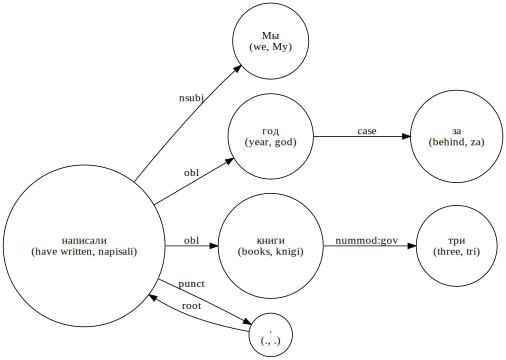

In [7]:
ana=lambda sents: CoreNlpViz().analyse(sents, nlp, get_word_map('ru','en', sents))
ana('Мы за год написали три книги .')

text: Мы 	lemma: мы	upos: PRON	xpos: _
text: за 	lemma: за	upos: ADP	xpos: _
text: год 	lemma: год	upos: NOUN	xpos: _
text: написали 	lemma: писать	upos: VERB	xpos: _
text: три 	lemma: три	upos: NUM	xpos: _
text: книги 	lemma: книга	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Мы', '4', 'nsubj')
('за', '3', 'case')
('год', '4', 'obl')
('написали', '0', 'root')
('три', '6', 'nummod:gov')
('книги', '4', 'obl')
('.', '4', 'punct')


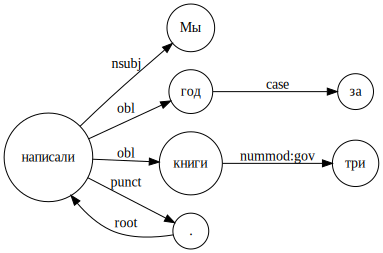

In [9]:
ana_s=lambda sents: CoreNlpViz().analyse(sents, nlp)
ana_s('Мы за год написали три книги.')

text: Мы 	lemma: мы	upos: PRON	xpos: _
text: написали 	lemma: писать	upos: VERB	xpos: _
text: три 	lemma: три	upos: NUM	xpos: _
text: книги 	lemma: книга	upos: NOUN	xpos: _
text: за 	lemma: за	upos: ADP	xpos: _
text: год 	lemma: год	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Мы', '2', 'nsubj')
('написали', '0', 'root')
('три', '4', 'nummod:gov')
('книги', '2', 'obl')
('за', '6', 'case')
('год', '4', 'nmod')
('.', '2', 'punct')


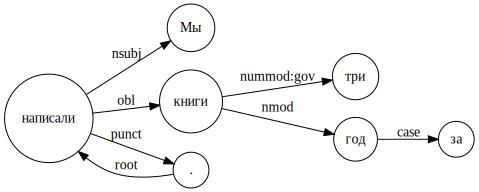

In [10]:
ana_s('Мы написали три книги за год.')

text: Мы 	lemma: мы	upos: PRON	xpos: _
text: написали 	lemma: писать	upos: VERB	xpos: _
text: три 	lemma: три	upos: NUM	xpos: _
text: книги 	lemma: книга	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Мы', '2', 'nsubj')
('написали', '0', 'root')
('три', '4', 'nummod:gov')
('книги', '2', 'obl')
('.', '2', 'punct')


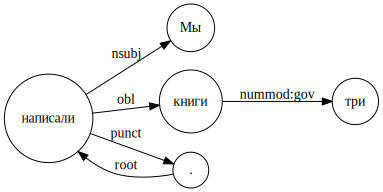

In [11]:
ana_s('Мы написали три книги.')

text: Мы 	lemma: мы	upos: PRON	xpos: _
text: написали 	lemma: писать	upos: VERB	xpos: _
text: книги 	lemma: книга	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Мы', '2', 'nsubj')
('написали', '0', 'root')
('книги', '2', 'obj')
('.', '2', 'punct')


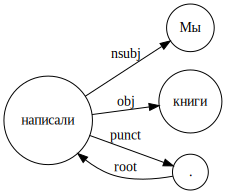

In [12]:
ana_s('Мы написали книги.')

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_tokenizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_lemmatizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus_parser.pt', 'pretrain_path': '/pi/ai/corenlp/ru_syntagrus_models/ru_syntagrus.pretrain.pt', 'lang': 'ru'

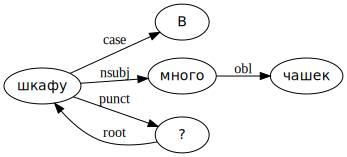

In [1]:
import sagas
sagas.dia('ru').ana_s('В шкафу много чашек?')

系词被不被视为条款的头，而是非语言谓词，如上述例示。这种分析的动机是，许多语言在这种结构中经常或总是缺乏明显的联系，如下面的俄罗斯例子所示：
```
Иван лучший танцор  (лучший和танцор是amod关系)
伊万是最好的舞者
```

text: Следующий 	lemma: следующий	upos: ADJ	xpos: _
text: день 	lemma: день	upos: NOUN	xpos: _
text: — 	lemma: —	upos: PUNCT	xpos: _
text: пятница 	lemma: пятница	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Следующий', '2', 'amod')
('день', '0', 'root')
('—', '4', 'punct')
('пятница', '2', 'nsubj')
('.', '4', 'punct')


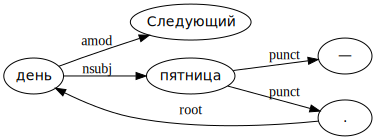

In [2]:
sagas.dia('ru').ana_s('Следующий день — пятница.')

text: Вторник 	lemma: вторник	upos: NOUN	xpos: _
text: — 	lemma: —	upos: PUNCT	xpos: _
text: второй 	lemma: второй	upos: ADJ	xpos: _
text: день 	lemma: день	upos: NOUN	xpos: _
text: недели 	lemma: неделя	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Вторник', '0', 'root')
('—', '1', 'punct')
('второй', '4', 'amod')
('день', '1', 'orphan')
('недели', '4', 'nmod')
('.', '4', 'punct')


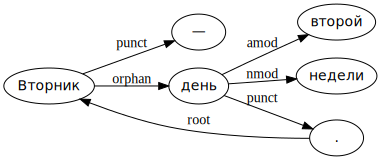

In [3]:
sagas.dia('ru').ana_s('Вторник — второй день недели.')